## Hey Julie! Scroll down for Support Vector Machines Guided Example and Challenge... :-P

In [94]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline

In [95]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [96]:
speed_dating = pd.read_csv('Speed Dating Data.csv',encoding="latin-1")

speed_dating = speed_dating.sample(frac=1).reset_index(drop=True)

# I'm going to get rid of waves 6-9 since they did their data differently...

# speed_dating = speed_dating.loc[(speed_dating['wave'] < 6 )| (speed_dating['wave'] > 9 )]

In [97]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
print(speed_dating.shape)
print(speed_dating.iid.nunique())
speed_dating

(8378, 195)
551


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,512,4.0,0,7,2,21,22,7,7.0,7,11,541.0,0,-0.19,0,23.0,4.0,40.00,30.00,0.00,20.00,0.00,10.00,1,10.0,10.0,5.0,7.0,6.0,5.0,10.0,4.0,2.0,NaN,MFA Acting Program,15.0,Hamilton College,"1,280.00","27,350.00",2.0,1.0,1.0,"Cambridge, MA","2,140",NaN,1.0,3.0,2.0,Actress,6.0,1.0,1.0,1.0,8.0,9.0,10.0,8.0,0.0,9.0,9.0,6.0,10.0,9.0,7.0,10.0,5.0,5.0,NaN,NaN,20.00,20.00,20.00,20.00,5.00,15.00,50.0,5.0,5.0,20.0,10.0,10.0,50.00,5.00,5.00,20.00,10.00,10.00,7.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,7.0,6.0,0,5.0,9.0,9.0,3.0,9.0,4.0,6.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,2.0,40.0,10.0,10.0,10.0,10.0,5.0,40.00,10.00,10.00,10.00,5.00,25.00,60.0,5.0,5.0,5.0,5.0,20.0,60.00,5.00,5.00,5.00,5.00,20.00,7.0,7.0,7.0,9.0,6.0,7.0,6.0,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,4.0,0,7,2,2,16,10,NaN,6,16,55.0,0,-0.22,0,23.0,1.0,20.00,25.00,25.00,10.00,10.00,10.00,1,8.0,9.0,9.0,8.0,8.0,6.0,8.0,6.0,2.0,27.0,social work,11.0,NaN,NaN,NaN,2.0,2.0,3.0,new york,"11,561","43,185.00",2.0,6.0,4.0,health/nutrition oriented social worker,9.0,10.0,1.0,10.0,9.0,6.0,6.0,10.0,6.0,3.0,6.0,1.0,6.0,9.0,8.0,8.0,6.0,7.0,5.0,3.0,10.00,20.00,20.00,15.00,20.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,35.00,10.00,15.00,20.00,10.00,10.00,7.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,0,8.0,7.0,7.0,NaN,NaN,2.0,6.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,15.00,15.00,10.00,25.00,10.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,289,17.0,1,34,2,11,21,5,5.0,16,7,258.0,0,0.42,0,25.0,6.0,7.00,35.00,20.00,20.00,5.00,13.00,1,9.0,6.0,8.0,10.0,NaN,NaN,7.0,2.0,2.0,28.0,MBA / Master of International Affairs (SIPA),8.0,Harvey Mudd College (Physics),"1,460.00","23,187.00",4.0,1.0,2.0,California,"92,064","53,229.00",1.0,4.0,1.0,Venture Capital/Consulting/Government,7.0,10.0,6.0,1.0,7.0,3.0,6.0,10.0,5.0,3.0,10.0,6.0,5.0,7.0,6.0,8.0,2.0,1.0,7.0,NaN,20.00,30.00,10.00,20.00,0.00,20.00,70.0,5.0,5.0,20.0,0.0,0.0,30.00,20.00,15.00,15.00,20.00,0.00,4.0,9.0,10.0,8.0,8.0,4.0,6.0,8.0,9.0,10.0,0,7.0,6.0,7.0,2.0,7.0,2.0,6.0,3.0,0.0,2.0,15.00,25.00,10.00,20.00,10.00,20.00,3.0,9.0,9.0,8.0,9.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,20.00,30.00,15.00,20.00,5.00,10.00,50.0,10.0,10.0,20.0,5.0,5.0,40.00,20.00,20.00,5.00,10.

In [98]:
speed_dating1 = speed_dating[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','gender' ]].dropna()

In [99]:
print(list(speed_dating.columns))

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [100]:
speed_corr = speed_dating1.corr()
print(speed_corr.columns)
speed_corr

Index(['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'gender'],
      dtype='object')


,dec,attr,sinc,intel,fun,amb,shar,like,prob,gender
dec,1.000000,0.487539,0.206960,0.212745,0.411698,0.183744,0.401591,0.516043,0.312413,0.117894
attr,0.487539,1.000000,0.404222,0.383888,0.589231,0.354461,0.486769,0.667723,0.277206,0.132511
sinc,0.206960,0.404222,1.000000,0.665593,0.507224,0.462317,0.397207,0.520797,0.332566,0.041946
intel,0.212745,0.383888,0.665593,1.000000,0.498910,0.627679,0.401485,0.506232,0.280665,-0.057127
fun,0.411698,0.589231,0.507224,0.498910,1.000000,0.492723,0.615875,0.689726,0.390512,0.061190
amb,0.183744,0.354461,0.462317,0.627679,0.492723,1.000000,0.431798,0.444707,0.280203,-0.099041
shar,0.401591,0.486769,0.397207,0.401485,0.615875,0.431798,1.000000,0.660098,0.474377,0.034502
like,0.516043,0.667723,0.520797,0.506232,0.689726,0.444707,0.660098,1.000000,0.482469,0.070421
prob,0.312413,0.277206,0.332566,0.280665,0.390512,0.280203,0.474377,0.482469,1.000000,0.008774
gender,0.117894,0.132511,0.041946,-0.057127,0.061190,-0.099041,0.034502,0.070421,0.008774,1.000000


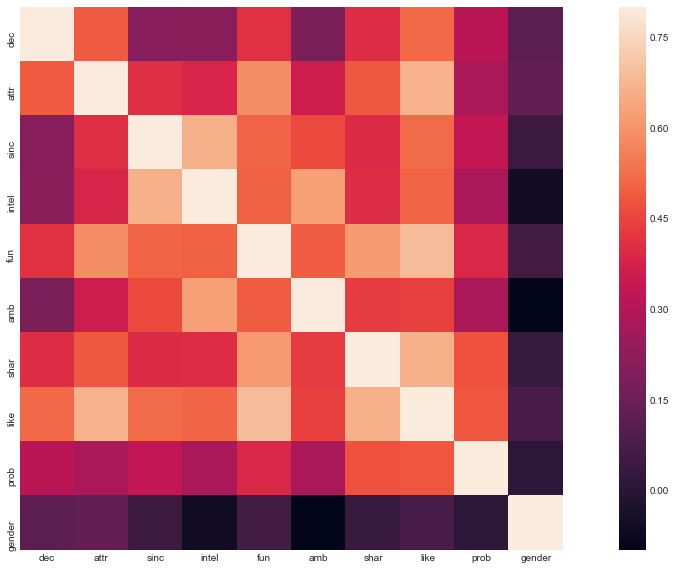

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(speed_corr, vmax=.8, square=True)
plt.show()

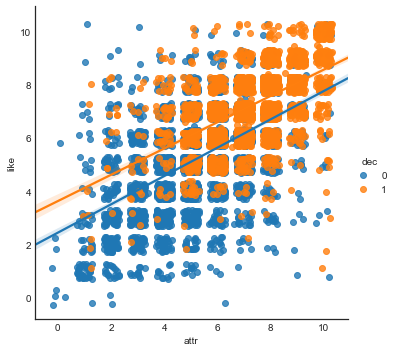

In [102]:
sns.lmplot(x="attr", y="like", data=speed_dating1, hue="dec",x_jitter=0.3, y_jitter=0.3)
plt.show()

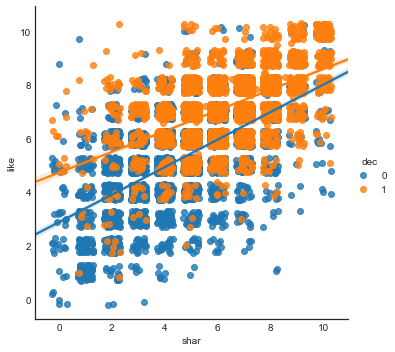

In [103]:
sns.lmplot(x="shar", y="like", data=speed_dating1, hue="dec",x_jitter=0.3, y_jitter=0.3)
plt.show()

[ 0.13832176 -0.41668264]


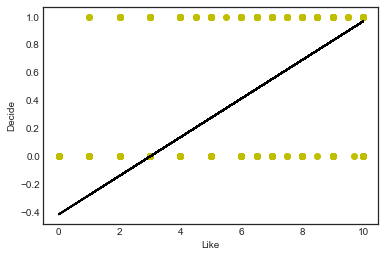

In [104]:
x = speed_dating1.like
y = speed_dating1.dec

# Calculate linear regression for x and bin_y.
fit = np.polyfit(x,y,1)

print(fit)

# Work as a function to return the predicted value of y.
fit_fn = np.poly1d(fit)

# Display our results.
plt.plot(x, y, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Like')
plt.ylabel('Decide')
plt.show()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False  True]
[  6.    4.    8.    9.    3.    7.    5.    2.    1.   10.    6.5   8.5
   0.    7.5   9.7]
[0.59699892818863876, 0.082352941176470587, 3.0557620817843865, 5.0655737704918034, 0.036363636363636362, 1.473170731707317, 0.20626349892008639, 0.032432432432432434, 0.021052631578947368, 6.4500000000000002, 2.5, 6.0, 0.0, 2.0, inf, inf, inf, 0.0]
[0.59699892818863876, 0.082352941176470587, 3.0557620817843865, 5.0655737704918034, 0.036363636363636362, 1.473170731707317, 0.20626349892008639, 0.032432432432432434, 0.021052631578947368, 6.4500000000000002, 2.5, 6.0, 0.0, 2.0, 0.0]
[ 0.50556096 -1.10432967]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':


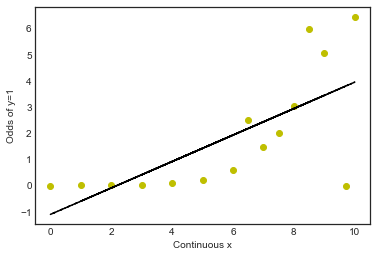

In [105]:
# Unique values in x.
xvals = x.unique()
# print(xvals)
# Calculate and store the odds.
yodds = []
for xi in xvals: 
    y1_ct = y[x == xi].sum()  # The number of trials y = 1.
    y0_ct = len(y[x == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    
# Calculate linear regression for x and yodds.
# print(list(xvals))


idx = np.isfinite(xvals) & np.isfinite(yodds)
print(idx)
print(xvals[idx])

print(yodds)

yodds = [num for num in yodds if num <= 10]


print(yodds)

xvals = xvals[idx]

fit = np.polyfit(xvals, yodds, 1)

print(fit)

# Work as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display our work.

plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

[  6.    4.    8.    9.    3.    7.    5.    2.    1.   10.    6.5   8.5]
[-0.51583996 -2.49674111  1.11702902  1.62246741 -3.314186    0.38741704
 -1.57860081 -3.42859636 -3.86072971  1.86408013  0.91629073  1.79175947]
[ 0.74770905 -4.98627365]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


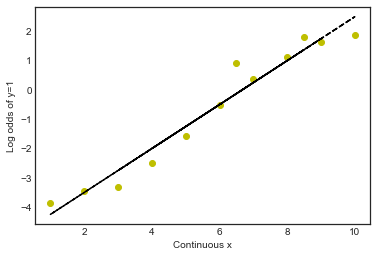

In [106]:
# Natural log of the odds.
ln_yodds = np.log(yodds)

xvals = xvals[:-3]
ln_yodds = ln_yodds[:-3]

# xvals = [x for x in xvals if x > 0]
# ln_yodds = [y for y in ln_yodds if y > -10]

print(xvals)
print(ln_yodds)


# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, ln_yodds, 1)




print(fit)
# Works as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display.
plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')

plt.show()

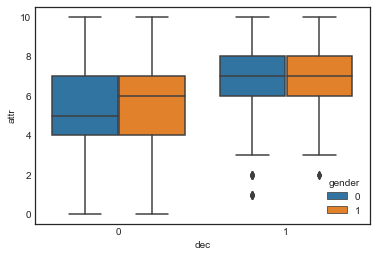

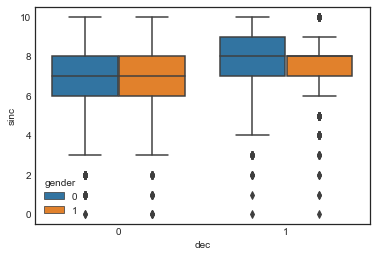

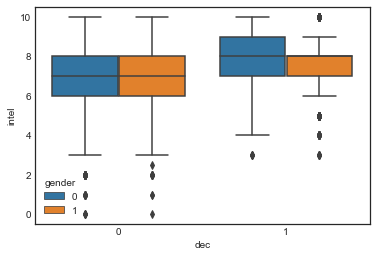

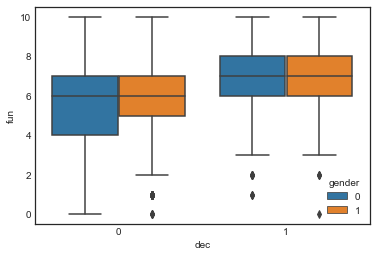

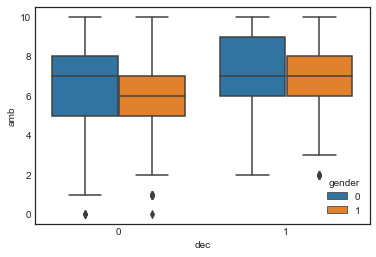

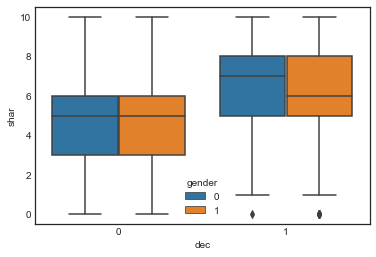

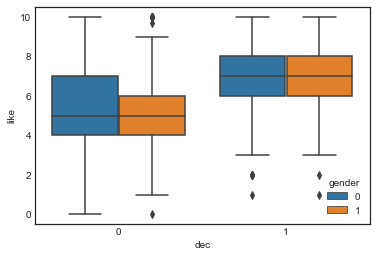

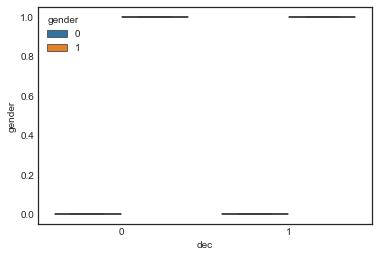

In [107]:
# Bivariate relationships of predictors to admissions outcome.
speed_dating1_columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']

def make_scatter():
    for column in speed_dating1_columns:
        sns.boxplot(x="dec", y=column, hue = 'gender', data=speed_dating1)
        plt.show()

make_scatter()

# I find it interesting that there are people who scored 10s in each category and 
# yet they still weren't chosen.

In [108]:
speed_dating1_rankings = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']].corr()

           attr      sinc     intel       fun       amb      shar      like
attr   1.000000  0.404222  0.383888  0.589231  0.354461  0.486769  0.667723
sinc   0.404222  1.000000  0.665593  0.507224  0.462317  0.397207  0.520797
intel  0.383888  0.665593  1.000000  0.498910  0.627679  0.401485  0.506232
fun    0.589231  0.507224  0.498910  1.000000  0.492723  0.615875  0.689726
amb    0.354461  0.462317  0.627679  0.492723  1.000000  0.431798  0.444707
shar   0.486769  0.397207  0.401485  0.615875  0.431798  1.000000  0.660098
like   0.667723  0.520797  0.506232  0.689726  0.444707  0.660098  1.000000


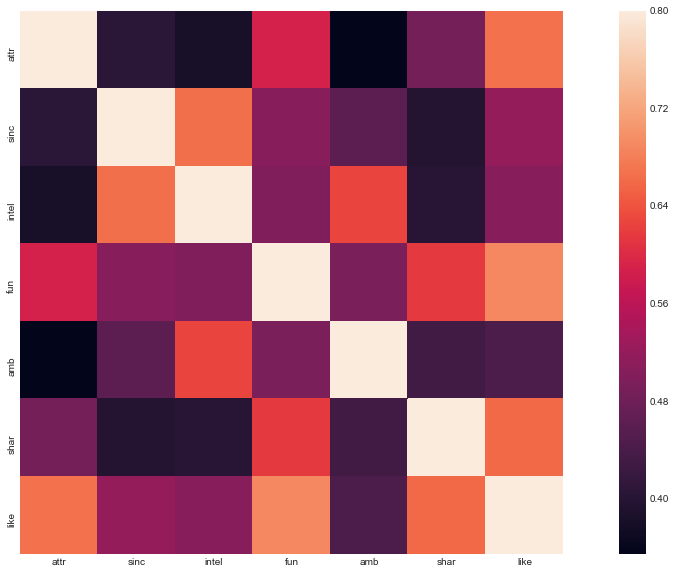

In [109]:
print(speed_dating1_rankings)

plt.figure(figsize=(20,10))
sns.heatmap(speed_dating1_rankings, vmax=.8, square=True)
plt.show()

In [110]:
# Declare predictors.
X_statsmod = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(speed_dating1['dec'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.479112
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 6963
Model:                          Logit   Df Residuals:                     6955
Method:                           MLE   Df Model:                            7
Date:                Fri, 10 Nov 2017   Pseudo R-squ.:                  0.2992
Time:                        06:42:19   Log-Likelihood:                -3336.1
converged:                       True   LL-Null:                       -4760.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.4119      0.023     17.938      0.000       0.367       0.457
sinc          -0.1869      0.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(speed_dating1['dec'], pred_y_statsmod)

print('\n Accuracy by decision status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by decision status
col_0     0     1
dec              
0      3219   741
1       851  2152

 Percentage accuracy
0.771362918282


## Not sure what this does but it gives me the same results...

In [112]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = speed_dating1['dec']
X = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 0.41189737 -0.18689759 -0.02599245  0.14865259 -0.1757967   0.15056364
   0.59312212]]
[-5.76131852]

 Accuracy by admission status
dec       0     1
row_0            
0      3219   851
1       741  2152

 Percentage accuracy
0.771362918282


## I'm going to do the exact same thing without the 'like' feature...

In [113]:
# Declare predictors.
X_statsmod = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(speed_dating1['dec'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507961
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 6963
Model:                          Logit   Df Residuals:                     6956
Method:                           MLE   Df Model:                            6
Date:                Fri, 10 Nov 2017   Pseudo R-squ.:                  0.2570
Time:                        06:42:19   Log-Likelihood:                -3536.9
converged:                       True   LL-Null:                       -4760.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.5509      0.022     25.302      0.000       0.508       0.594
sinc          -0.1114      0.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(speed_dating1['dec'], pred_y_statsmod)

print('\n Accuracy by decision status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by decision status
col_0     0     1
dec              
0      3167   793
1       957  2046

 Percentage accuracy
0.748671549619


## The percentage accuracy went down... So I guess I should leave it in... Now, I'm going to try it with the 'prob' feature included...

In [131]:
# Declare predictors.
X_statsmod = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(speed_dating1['dec'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.474405
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    dec   No. Observations:                 6963
Model:                          Logit   Df Residuals:                     6954
Method:                           MLE   Df Model:                            8
Date:                Fri, 10 Nov 2017   Pseudo R-squ.:                  0.3061
Time:                        06:47:37   Log-Likelihood:                -3303.3
converged:                       True   LL-Null:                       -4760.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.4339      0.023     18.585      0.000       0.388       0.480
sinc          -0.2077      0.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(speed_dating1['dec'], pred_y_statsmod)

print('\n Accuracy by decision status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by decision status
col_0     0     1
dec              
0      3191   769
1       860  2143

 Percentage accuracy
0.76604911676


## About the same as without 'prob', just a little bit less...

In [115]:
import math
from sklearn import linear_model
from sklearn import preprocessing
sns.set_style('white')

In [133]:
speed_dating2 = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]

print(speed_dating2.head())

names = speed_dating2.columns

speed_dating2 = pd.DataFrame(preprocessing.scale(speed_dating2), columns=names)

print(speed_dating2.head())

trainsize = int(speed_dating2.shape[0] / 2)
df_test = speed_dating2.iloc[trainsize:, :].copy()
df_train = speed_dating2.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['like'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['like'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)

# Test the simpler model with smaller coefficients.
Y_test = df_test['like'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['like'])]
print('\nR-squared simple model:')
print(regr1.score(X_test, Y_test))

   attr  sinc  intel  fun  amb  shar  like  prob
0   5.0   9.0    9.0  3.0  9.0   4.0   6.0   5.0
2   7.0   6.0    7.0  2.0  7.0   2.0   6.0   3.0
3   5.0   8.0    9.0  6.0  7.0   9.0   6.0   7.0
4   3.0   5.0    5.0  5.0  5.0   3.0   4.0   2.0
7   6.0   9.0    8.0  7.0  5.0   5.0   6.0   5.0
       attr      sinc     intel       fun       amb      shar      like  \
0 -0.612253  1.055174  1.055307 -1.737001  1.249569 -0.679623 -0.070554   
1  0.414707 -0.668032 -0.229888 -2.248579  0.134410 -1.612125 -0.070554   
2 -0.612253  0.480772  1.055307 -0.202266  0.134410  1.651632 -0.070554   
3 -1.639214 -1.242434 -1.515083 -0.713844 -0.980749 -1.145874 -1.152999   
4 -0.098773  1.055174  0.412710  0.309313 -0.980749 -0.213372 -0.070554   

       prob  
0 -0.118034  
1 -1.051716  
2  0.815647  
3 -1.518556  
4 -0.118034  

R-squared simple model:
0.673695115725

R-squared simple model:
0.673069815085


In [134]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=0.5, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

print(ridgeregr.score(X_test, Y_test))

0.673693507729
[ 0.29845273  0.08675148  0.11152037  0.21206317 -0.01071781  0.22790833
  0.16064793]
0.673071226451


## I made a realization since I did leave out some code where the curriculum was adding all of these randome features... It was throwing them in on purpose to see which features because the ridge regression would end up minimizing their influence if it didn't contribute to the model...

## So the ridge regression had R-squared values in the 30s... Let's see how a lasso regression does...

In [135]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)


R² for the model with few features:
0.453855977903

Parameter estimates for the model with few features:
[ 0.12776653  0.          0.          0.18850822  0.          0.12431746
  0.          0.01034943]


## Apparently it's even lower... hmmmm... Is this right Julie? lol

## Here is the guided example and challenge from Support Vectors Machine... This first part I used the 6 features to predict the continuous 'like' feature in a Support Vectors Regression...

In [119]:
from sklearn.svm import SVR
svr = SVR()
X = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]
Y = speed_dating1[['like']]
svr.fit(X,Y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Here is a scatter plot that compares the prediction number to the actual 'like' number... Definitely a positive correlation... 

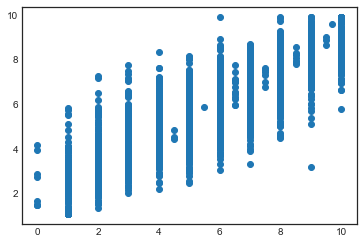

In [120]:
plt.scatter(Y, svr.predict(X))

In [121]:
svr.score(X, Y)

0.71782297401691908

In [122]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validati

array([ 0.63777928,  0.62604048,  0.59870799,  0.61339636,  0.6112701 ])

## Now I'm going to change it into a binary classifier... using the 'dec' column...

In [136]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.

X = speed_dating1[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar','prob']]
Y = speed_dating1[['dec']]
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Tried to plot it but it came out pretty useless.... lol

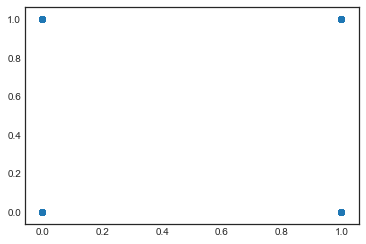

In [137]:
plt.scatter(Y, svm.predict(X))

## It had a pretty good score though... so it was better at predicting a yes or no for 'dec' than predicting the 'like' score...

In [138]:
svm.score(X, Y)

0.75484704868591124

In [139]:
pd.crosstab(speed_dating1['dec'], svm.predict(X))

col_0,0,1
dec,,
0,3182,778
1,929,2074


In [141]:
(3182 + 2074)/(3182 + 2074 + 778 + 929)

0.7548470486859112

## I'm going to run a SVC again and this time drop out some of the features that were dropped by the lasso and ridge regressions.... 

In [142]:
from sklearn.svm import SVR
svr = SVR()
X = speed_dating1[['attr', 'fun', 'shar','prob']]
Y = speed_dating1[['like']]
svr.fit(X,Y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

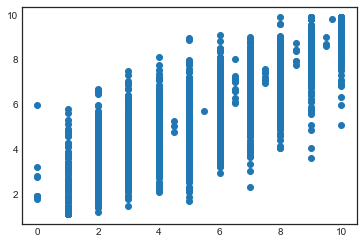

In [143]:
plt.scatter(Y, svr.predict(X))

In [144]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validati

array([ 0.62594614,  0.63930933,  0.62203713,  0.62955432,  0.63224944])

## Hmmmm... slightly better except for the last one... Actually, after shuffling the data, it's evened out more... 